# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from joblib import dump, load

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [47]:
df = pd.read_csv('../../datasets/dayofweek.csv')
df


,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.788667,-2.562352,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.756764,-2.562352,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.724861,-2.562352,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.692958,-2.562352,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.661055,-2.562352,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.533442,0.945382,3
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.629151,0.945382,3
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.597248,0.945382,3
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.565345,0.945382,3


In [48]:
x = df.drop('dayofweek', axis=1)
y = df['dayofweek']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=21)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

dayofweek
3    0.232196
6    0.212908
1    0.164688
5    0.160237
2    0.092730
0    0.077893
4    0.059347
Name: proportion, dtype: float64
dayofweek
3    0.245562
6    0.204142
5    0.162722
1    0.153846
0    0.091716
4    0.071006
2    0.071006
Name: proportion, dtype: float64


In [49]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=21, stratify=y)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

dayofweek
3    0.234421
6    0.211424
1    0.162463
5    0.160979
2    0.088279
0    0.080861
4    0.061573
Name: proportion, dtype: float64
dayofweek
3    0.236686
6    0.210059
1    0.162722
5    0.159763
2    0.088757
0    0.079882
4    0.062130
Name: proportion, dtype: float64


## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [50]:
logreg = LogisticRegression(random_state=21, fit_intercept=False)
logreg.fit(x_train,y_train)
predict = logreg.predict(x_test)
accuracy = accuracy_score(y_test, predict)
accuracy

0.6331360946745562

0.6405693950177936 для 02

### b. SVM

In [51]:
svc = SVC(random_state=21, kernel='linear', probability=True)
svc.fit(x_train,y_train)
predict = svc.predict(x_test)
accuracy = accuracy_score(y_test, predict)
accuracy

0.7159763313609467

0.702846975088968 для 02

### c. Decision tree

In [52]:
tree = DecisionTreeClassifier(max_depth=4, random_state=21)
tree.fit(x_train,y_train)
predict = tree.predict(x_test)
accuracy = accuracy_score(y_test, predict)
accuracy

0.5295857988165681

0.5516014234875445 для 02

### d. Random forest

In [53]:
randfor = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
randfor.fit(x_train,y_train)
predict = randfor.predict(x_test)
accuracy = accuracy_score(y_test, predict)
accuracy

0.9349112426035503

0.9994068801897983 для 02

NO,FOREST

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [54]:
model = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear')
scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')
accuracy = scores.mean()
std = scores.std()
print(accuracy, std)

0.45291983657368284 0.16960708432126997


/Users/stepurinadaria/резюме/github/ML/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/Users/stepurinadaria/резюме/github/ML/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/Users/stepurinadaria/резюме/github/ML/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is d

### b. SVM

In [55]:
model =  SVC(random_state=21, kernel='linear', probability=True)
scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')
accuracy = scores.mean()
std = scores.std()
print(accuracy, std)
scores

0.5051986475063398 0.15857963555262297


array([0.31952663, 0.47337278, 0.52071006, 0.59171598, 0.66863905,
       0.69230769, 0.75595238, 0.36904762, 0.375     , 0.28571429])

### c. Decision tree

In [56]:
model = DecisionTreeClassifier(max_depth=4, random_state=21)
scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')
accuracy = scores.mean()
std = scores.std()
print(accuracy, std)

0.3883523527754297 0.11835394295385691


### d. Random forest

In [57]:
model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')
accuracy = scores.mean()
std = scores.std()
print(accuracy, std)

0.6572414764722457 0.18188358321587952


## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [58]:
final_model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
scores = cross_val_score(final_model, x, y, cv=10, scoring='accuracy')
accuracy = scores.mean()
std = scores.std()
print(accuracy, std)

0.6572414764722457 0.18188358321587952


In [59]:
model = RandomForestClassifier(n_estimators=20, max_depth=25, random_state=21)
scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')
accuracy = scores.mean()
std = scores.std()
print(accuracy, std)

0.6477528881375035 0.17805600310508957


In [60]:
model = RandomForestClassifier(n_estimators=20, max_depth=15, random_state=21)
scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')
accuracy = scores.mean()
std = scores.std()
print(accuracy, std)

0.6412052690898845 0.16305708760075646


In [61]:
model = RandomForestClassifier(n_estimators=200, max_depth=150, random_state=21)
scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')
accuracy = scores.mean()
std = scores.std()
print(accuracy, std)

0.6507326007326008 0.1777501193573551


In [62]:
final_model.fit(x_train, y_train)
predict = final_model.predict(x_test)
accuracy = accuracy_score(y_test, predict)
accuracy

0.9349112426035503

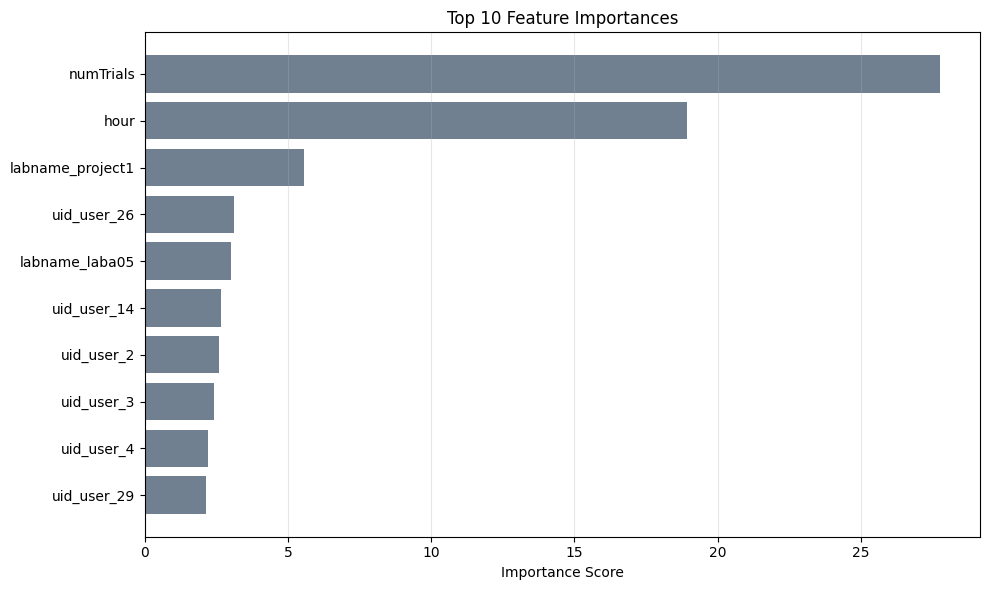

In [63]:
importances = np.sum([est.feature_importances_ for est in final_model.estimators_], axis=0)
importances = importances.reshape(-1)  
importance_df = pd.DataFrame({
            'feature': x.columns,
            'importance': importances
    }).sort_values('importance').tail(10)
        
        
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'], color='#708090')
plt.title(f'Top {10} Feature Importances')
plt.xlabel('Importance Score')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [64]:
dump(final_model, "models/random_forest_model.joblib")

['models/random_forest_model.joblib']

In [65]:
loaded_model = load("models/random_forest_model.joblib")
y_pred_loaded = loaded_model.predict(x_test)
accuracy_score(y_test, y_pred_loaded)

0.9349112426035503